## Setup

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model


## Part 1 - linearly separable data

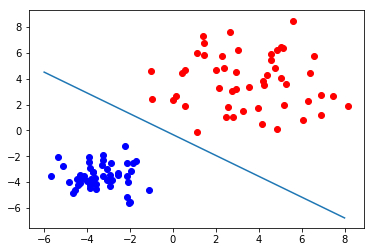

In [2]:
X=np.loadtxt("data/linsep-traindata.csv", delimiter=',')
y=np.loadtxt("data/linsep-trainclass.csv", delimiter=',')

logreg = linear_model.LogisticRegression()
logreg.fit(X, y)

decision_boundary_x=np.asarray([-6,8])
decision_boundary_y=(-logreg.intercept_-logreg.coef_[0,0]*decision_boundary_x)/logreg.coef_[0,1]

plt.scatter(X[y==1,0], X[y==1,1], c='b')
plt.scatter(X[y==-1,0], X[y==-1,1], c='r')
plt.plot(decision_boundary_x, decision_boundary_y)
plt.show()    


## Part 2 - nonseparable data

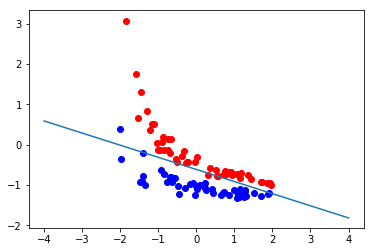

In [3]:
X=np.loadtxt("data/nonlinsep-traindata.csv", delimiter=',')
y=np.loadtxt("data/nonlinsep-trainclass.csv", delimiter=',')

logreg = linear_model.LogisticRegression()
logreg.fit(X, y)

decision_boundary_x=np.asarray([-4,4])
decision_boundary_y=(-logreg.intercept_-logreg.coef_[0,0]*decision_boundary_x)/logreg.coef_[0,1]

plt.scatter(X[y==1,0], X[y==1,1], c='b')
plt.scatter(X[y==-1,0], X[y==-1,1], c='r')
plt.plot(decision_boundary_x, decision_boundary_y)
plt.show()